<a href="https://colab.research.google.com/github/mfajaranugrah/Tugas_python/blob/main/Tugas14_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [130]:
WATT_TO_MILIWATT = 1000
NtL = lambda x: 10*np.log10(x)
LtN = lambda x: 10**(x/10)

#Daya Terima 
def dater(ptx,Lp,gtx,grx,):
  #mengubah ptx dari watt ke miliwatt
  ptxm = ptx * WATT_TO_MILIWATT

  #mengubah ptxm dari numerik ke logaritmik
  ptxlog=NtL(ptxm)

  #mencari daya terima
  prx=ptxlog-Lp+gtx+grx

  #mengubah hasil prx ke miliwatt
  prxnum=LtN(prx)

  return prxnum

In [131]:
MHZ_TO_HZ = 1000000

#SNR
def SNR(prxnum,BW):
  #Mengubah BW dari MHz ke Hz
  BWHz = BW * MHZ_TO_HZ

  #menghitung noise
  ns = -174 + (10*np.log10(BWHz))

  #mengubah hasil noise ke numerik
  nsn = LtN(ns)

  #menghitung SNR
  SNRnum = prxnum/nsn

  return SNRnum

In [132]:
#Kapasitas seluler 
def kasel(SNRnum,BWHz):
  ks = BWHz * np.log2(1+SNRnum)
  return ks

In [133]:
f=1800 #MHz
loc1='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
dt=30 #watt
gpeng=10 #db
gpen=2 #db
bw=5 #MHz
d=np.random.randint(dmin,dmax,N)

In [134]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
dt=30 #watt
gpeng=10 #db
gpen=2 #db
bw=5 #MHz
d=np.random.randint(dmin,dmax,N)

In [135]:
#Patloss dengan lokasi yg berbeda dan frekuensi yang sama 1800MHz
LpUrban=cos(f,loc1,tower,user,d)
LpOpen=cos(f,loc2,tower,user,d)
LpSuburban=cos(f,loc3,tower,user,d)

In [136]:
#Daya Terima dengan lokasi yg berbeda dan frekuensi yang sama 1800MHz
prxnumUrban=dater(dt,LpUrban,gpeng,gpen)
prxnumOpen=dater(dt,LpOpen,gpeng,gpen)
prxnumSuburban=dater(dt,LpSuburban,gpeng,gpen)

In [137]:
#Signal Noise Ratio (SNR) dengan lokasi yg berbeda dan frekuensi yang sama 1800MHz
SNRurban=SNR(prxnumUrban,bw)
SNRopen=SNR(prxnumOpen,bw)
SNRsuburban=SNR(prxnumSuburban,bw)

In [138]:
#Kapasitas seluler dengan lokasi yang berbeda dan frekuensi yang sama 1800MHz
ksUrban=kasel(SNRurban,bw)
ksOpen=kasel(SNRopen,bw)
ksSuburban=kasel(SNRsuburban,bw)

In [139]:
#Patloss dengan frekuensi yang bebeda dan lokasi berada di urban
LpUrban1=cos(f1,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [140]:
#Daya terima dengan frekuensi yang berbeda dan lokasi urban 
prxnumUrban1=dater(dt,LpUrban1,gpeng,gpen)
prxnumUrban2=dater(dt,LpUrban2,gpeng,gpen)
prxnumUrban3=dater(dt,LpUrban3,gpeng,gpen)

In [141]:
#Signal Noise Ratio (SNR) dengan frekuensi yang berbeda dan lokasi berada di urban
SNRurban1=SNR(prxnumUrban1,bw)
SNRurban2=SNR(prxnumUrban2,bw)
SNRurban3=SNR(prxnumUrban3,bw)

In [142]:
#Kapasitas seluler dengan frekuensi yang berbeda dan lokasi yang sama berada di urban
ksUrban1=kasel(SNRurban1,bw)
ksUrban2=kasel(SNRurban2,bw)
ksUrban3=kasel(SNRurban3,bw)

In [143]:
d_sort=d[np.argsort(d)]
LpUrban_sort=prxnumUrban[np.argsort(d)]
LpOpen_sort=prxnumOpen[np.argsort(d)]
LpSuburban_sort=prxnumSuburban[np.argsort(d)]

In [144]:
d_sort=d[np.argsort(d)]
LpUrban1_sort=prxnumUrban1[np.argsort(d)]
LpUrban2_sort=prxnumUrban2[np.argsort(d)]
LpUrban3_sort=prxnumUrban3[np.argsort(d)]

In [145]:
d_sort=d[np.argsort(d)]
prxnumUrban_sort=SNRurban[np.argsort(d)]
prxnumOpen_sort=SNRopen[np.argsort(d)]
prxnumSuburban_sort=SNRsuburban[np.argsort(d)]

In [146]:
d_sort=d[np.argsort(d)]
prxnumUrban1_sort=SNRurban1[np.argsort(d)]
prxnumUrban2_sort=SNRurban2[np.argsort(d)]
prxnumUrban3_sort=SNRurban3[np.argsort(d)]

In [147]:
d_sort=d[np.argsort(d)]
SNRurban_sort=ksUrban[np.argsort(d)]
SNRopen_sort=ksOpen[np.argsort(d)]
SNRsuburban_sort=ksSuburban[np.argsort(d)]

In [148]:
d_sort=d[np.argsort(d)]
SNRurban1_sort=ksUrban1[np.argsort(d)]
SNRurban2_sort=ksUrban2[np.argsort(d)]
SNRurban3_sort=ksUrban3[np.argsort(d)]

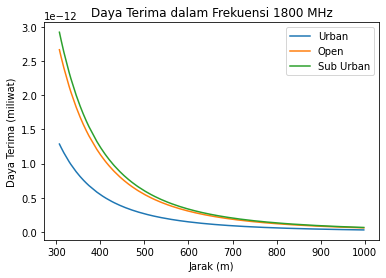

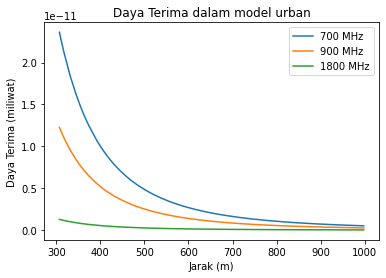

In [149]:
#Grafik perbandingan output perhitungan Daya Terima 

plt.figure()
plt.plot(d_sort,LpUrban_sort)
plt.plot(d_sort,LpOpen_sort)
plt.plot(d_sort,LpSuburban_sort)
plt.title('Daya Terima dalam Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliwat)')
plt.legend(['Urban','Open', 'Sub Urban'], loc='upper right')
plt.show()

plt.plot(d_sort,LpUrban1_sort)
plt.plot(d_sort,LpUrban2_sort)
plt.plot(d_sort,LpUrban3_sort)
plt.title('Daya Terima dalam model urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliwat)')
plt.legend(['700 MHz','900 MHz', '1800 MHz'], loc='upper right')
plt.show()

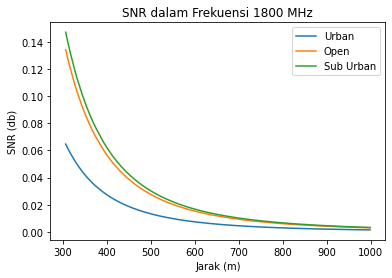

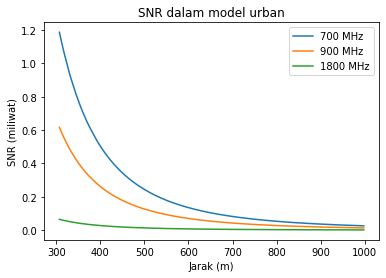

In [150]:
#Grafik perbandingan output perhitungan SNR

plt.figure()
plt.plot(d_sort,prxnumUrban_sort)
plt.plot(d_sort,prxnumOpen_sort)
plt.plot(d_sort,prxnumSuburban_sort)
plt.title('SNR dalam Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (db)')
plt.legend(['Urban','Open', 'Sub Urban'], loc='upper right')
plt.show()

plt.plot(d_sort,prxnumUrban1_sort)
plt.plot(d_sort,prxnumUrban2_sort)
plt.plot(d_sort,prxnumUrban3_sort)
plt.title('SNR dalam model urban')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (miliwat)')
plt.legend(['700 MHz','900 MHz', '1800 MHz'], loc='upper right')
plt.show()

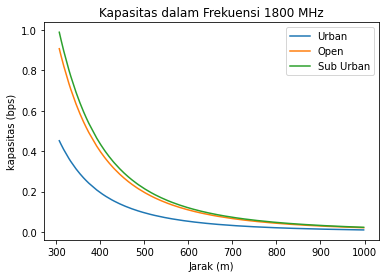

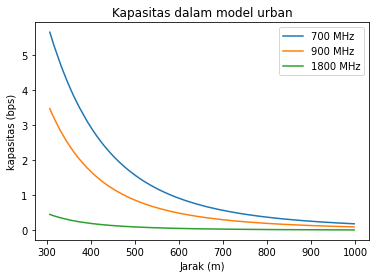

In [151]:
#Grafik perbandingan output perhitungan kapasitas

plt.figure()
plt.plot(d_sort,SNRurban_sort)
plt.plot(d_sort,SNRopen_sort)
plt.plot(d_sort,SNRsuburban_sort)
plt.title('Kapasitas dalam Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('kapasitas (bps)')
plt.legend(['Urban','Open', 'Sub Urban'], loc='upper right')
plt.show()

plt.plot(d_sort,SNRurban1_sort)
plt.plot(d_sort,SNRurban2_sort)
plt.plot(d_sort,SNRurban3_sort)
plt.title('Kapasitas dalam model urban')
plt.xlabel('Jarak (m)')
plt.ylabel('kapasitas (bps)')
plt.legend(['700 MHz','900 MHz', '1800 MHz'], loc='upper right')
plt.show()